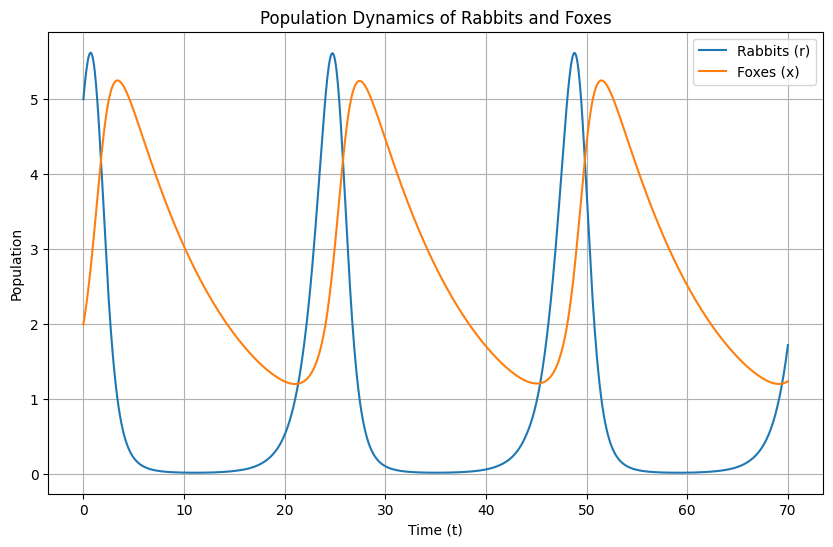

In [4]:
#Task 1: Solve the ODE system for r(t) and x(t) and plot the solution for 0 ≤ t ≤ 70.

#To solve this system of ordinary differential equations (ODEs), we can use numerical methods like the Runge-Kutta method.
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system
def system(t, Y):
    r, x = Y
    alpha = 1.1
    beta = 0.4
    delta = 0.1
    gamma = 0.1
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

# Set the initial conditions and time span
initial_conditions = [5, 2]  # r(0) = 5, x(0) = 2
t_span = (0, 70)

# Solve the ODE system
solution = solve_ivp(system, t_span, initial_conditions, t_eval=np.linspace(0, 70, 1000))

# Extract the solutions
t = solution.t
r = solution.y[0]
x = solution.y[1]

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t, r, label='Rabbits (r)')
plt.plot(t, x, label='Foxes (x)')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.title('Population Dynamics of Rabbits and Foxes')
plt.legend()
plt.grid(True)
plt.show()

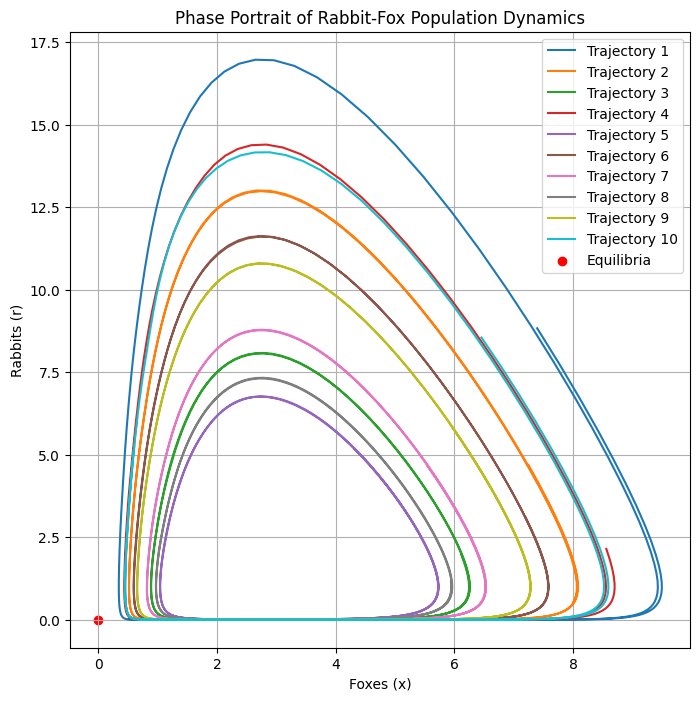

In [5]:
#Task 2: Create a phase plot (phase portrait) of 10 solutions with random initial values.

#To create a phase portrait, we'll generate 10 random initial conditions for r(0) and x(0) between 1 and 9 and plot the corresponding trajectories.
# Generate random initial conditions
num_trajectories = 10
initial_conditions = np.random.uniform(1, 9, size=(num_trajectories, 2))

# Plot the phase portrait
plt.figure(figsize=(8, 8))
for i in range(num_trajectories):
    solution = solve_ivp(system, t_span, initial_conditions[i], t_eval=np.linspace(0, 70, 1000))
    plt.plot(solution.y[1], solution.y[0], label=f'Trajectory {i+1}')

# Plot the equilibria
equilibria = solve_ivp(system, t_span, [0, 0], t_eval=[0])
plt.scatter(equilibria.y[1], equilibria.y[0], color='red', marker='o', label='Equilibria')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics')
plt.legend()
plt.grid(True)
plt.show()

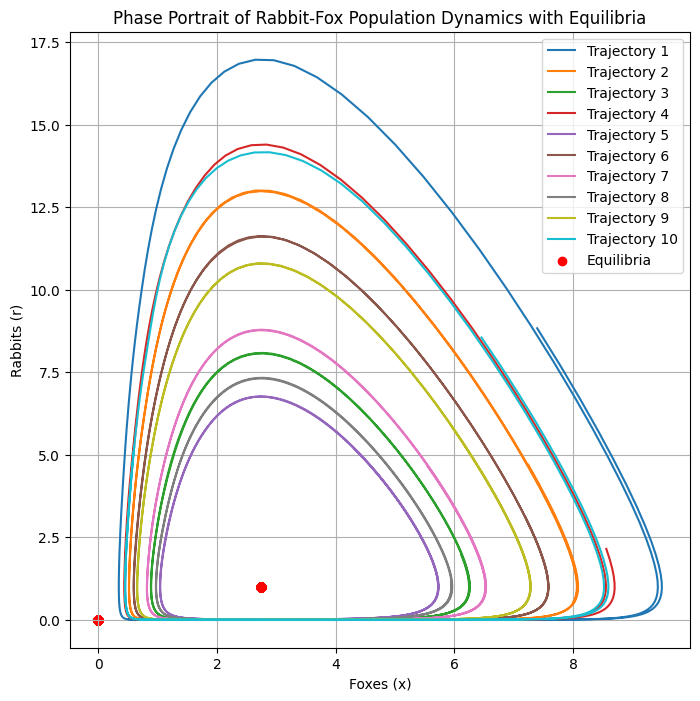

In [6]:
#Task 3: Find and mark the equilibria in the phase portrait.

#To find the equilibria, we need to solve the system of ODEs for the values of r and x where dr/dt = 0 and dx/dt = 0. These are the equilibrium points. We can then mark them in the phase portrait.
from scipy.optimize import root

# Define a function to find equilibria
def find_equilibria(Y):
    r, x = Y
    alpha = 1.1
    beta = 0.4
    delta = 0.1
    gamma = 0.1
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

# Solve for equilibria
equilibrium_points = []
for r_guess in np.linspace(0, 9, 100):
    for x_guess in np.linspace(0, 9, 100):
        sol = root(find_equilibria, [r_guess, x_guess])
        if sol.success and all(0 <= val <= 9 for val in sol.x):
            equilibrium_points.append(sol.x)

equilibrium_points = np.array(equilibrium_points)

# Plot the phase portrait with equilibria
plt.figure(figsize=(8, 8))
for i in range(num_trajectories):
    solution = solve_ivp(system, t_span, initial_conditions[i], t_eval=np.linspace(0, 70, 1000))
    plt.plot(solution.y[1], solution.y[0], label=f'Trajectory {i+1}')

plt.scatter(equilibrium_points[:, 1], equilibrium_points[:, 0], color='red', marker='o', label='Equilibria')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics with Equilibria')
plt.legend()
plt.grid(True)
plt.show()